<a href="https://colab.research.google.com/github/EnterTheBeginning/Machine-Learning/blob/master/HW1_Problem3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy ,Add forumlas, Add visualization

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Importing Data


In [2]:
from keras.datasets import mnist

(X_train_original, y_train_original), (X_test_original, y_test_original) = mnist.load_data()

Using TensorFlow backend.


In [0]:
X_train = X_train_original.reshape((60000, 28 * 28))
X_train = X_train.astype('float32') / 255

X_test = X_test_original.reshape((10000, 28 * 28))
X_test = X_test.astype('float32') / 255

In [0]:
y_train, y_test = y_train_original.reshape(60000,1),y_test_original.reshape(10000,1)



###Categorical encoding

Using one hot encoding with Numpy





In [0]:
y_train1 = np.zeros((y_train_original.shape[0],10))
y_train1[np.arange(y_train_original.shape[0]),y_train_original] = 1
#Return evenly spaced values within a given interval.
y_train = y_train1
y_test1 = np.zeros((y_test_original.shape[0],10))
y_test1[np.arange(y_test_original.shape[0]),y_test_original] = 1
#Return evenly spaced values within a given interval.
y_test = y_test1

Now that we have input and output ready

Lets start building our network

##Categorical Cross Entropy

1.   Weights
2.   Bias
3. Activation
4. Input X   
n = Number of Features which is 784   
m = Number of samples which in training set is 60000


In [0]:
# Weights, Bias
np.random.seed(47)
W = np.zeros((X_train.shape[1], 1))
b = np.zeros((1,1))


## Categorical Cross Enteropy (CCE) class:

---



In [0]:
class CCE:
  
  
  #class constructor
  #In order to save W for other methods such as prediction
  def __init__(self,W,b):
    self.W = np.zeros((X_train.shape[1],10))
    self.b = np.zeros((1,10))
    
    
  #Softmax method
  def softMax(self, Z):
    arg1 = np.exp(Z- np.max(Z,-1,keepdims = True))
    arg2 = arg1/(np.sum(arg1,-1,keepdims=True))
    return arg2

  def CCELoss(self,A,y):
    arg1 = np.sum(y* np.log(A), axis= -1)
    arg2 = -arg1
    return arg2
  
  def softMaxUpdate(self,X):
    arg1 = self.softMax(X.dot(self.W)+self.b)
    return arg1
  
  def derCCELoss(self,A,y):
    arg1 = A - y
    return arg1
  
    #Training weights and Biases
  def train(self, X, y,lr=0.01 , batch=4 , epochs = 10):
    m=60000
    history={"Loss":[]}

    for i in range(epochs):
      object_Loss = []
      for e in range(0,m,batch):
        X1= X[e:e+batch]
        y1= y[e:e+batch]
        Z= X1.dot(self.W)+self.b
        # soft Max Activation function
        A = self.softMax(Z)
        # Loss update
        Gradient= self.derCCELoss(A,y1)
        # Updating the weights
        self.W= self.W - lr * np.dot(Gradient.T,X1).T/batch
        # Updating the bias
        '!!!'
        self.b= self.b- lr*Gradient.mean(axis=0)
      object_Loss += [self.CCELoss(self.softMaxUpdate(X),y).mean()]
      history['Loss'] += [np.mean(object_Loss)]
      print(" Loss: {}\n".format(history['Loss'][-1]))
    print("Test accuracy : {} %".format(100 - np.mean(np.abs(network.softMaxUpdate(X_test) - y_test))*100))
    return history
        

  def predict(self,X):
        m = X.shape[0]
        #creating a prediction vector
        Z= X.dot(self.W)+self.b
        y_prediction = np.zeros((1,m))
        for i in range(A.shape[0]):
          if( A[i]>= 0.5):
            y_prediction[0,i] = 1
          else:
            y_prediction[0,i] = 0
        return y_prediction
    


###The results shown for the softMAX:

In [0]:
network = CCE(None,None)

In [18]:
results = network.train(X_train, y_train)

 Loss: 0.3374403925844957

 Loss: 0.30967219304091487

 Loss: 0.2972241707833748

 Loss: 0.2896512557242486

 Loss: 0.2843509917714353

 Loss: 0.28032925916153123

 Loss: 0.27711393358710595

 Loss: 0.2744481482339826

 Loss: 0.2721784569535309

 Loss: 0.270206697288041

Test accuracy : 97.44386436448686 %


In [15]:
print("Test accuracy : {} %".format(100 - np.mean(np.abs(network.softMaxUpdate(X_test) - y_test))*100))

Test accuracy : 97.44386436448686 %


###Visualization:

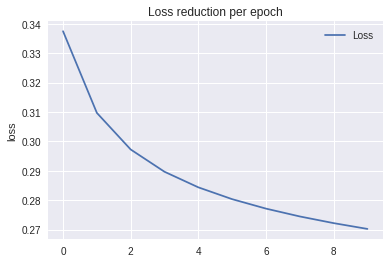

In [19]:
plt.figure(1)
plt.plot(results['Loss'], label='Loss')
# plt.plot(prediction,label='prediction',color = 'green')
plt.legend(loc='upper right')
plt.title('Loss reduction per epoch')
plt.ylabel('loss') 
plt.show()


Huse Test Accurecy boost